In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm

import os

In [62]:
root_path = "E:\\jupyter-workspace\\housing-price"
train = pd.read_csv(os.path.join(root_path, "train.csv"))
test = pd.read_csv(os.path.join(root_path, "test.csv"))

In [63]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [65]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
train_corr = train.drop("Id", axis=1).corr()
train_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [67]:
train_corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

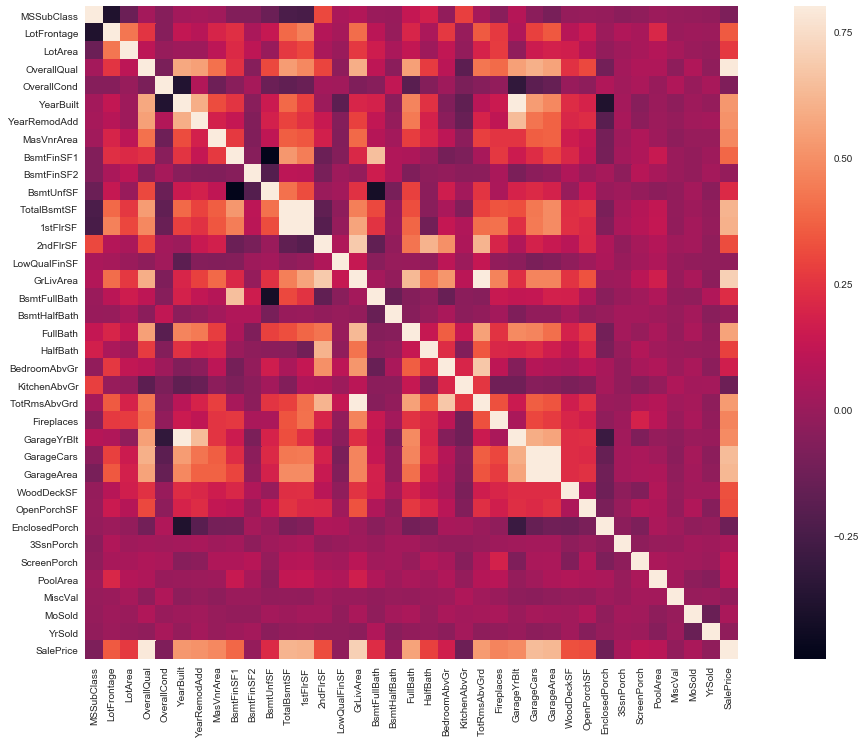

In [68]:
a = plt.subplots(figsize=(20, 12))
a = sns.heatmap(train_corr, vmax=.8, square=True)

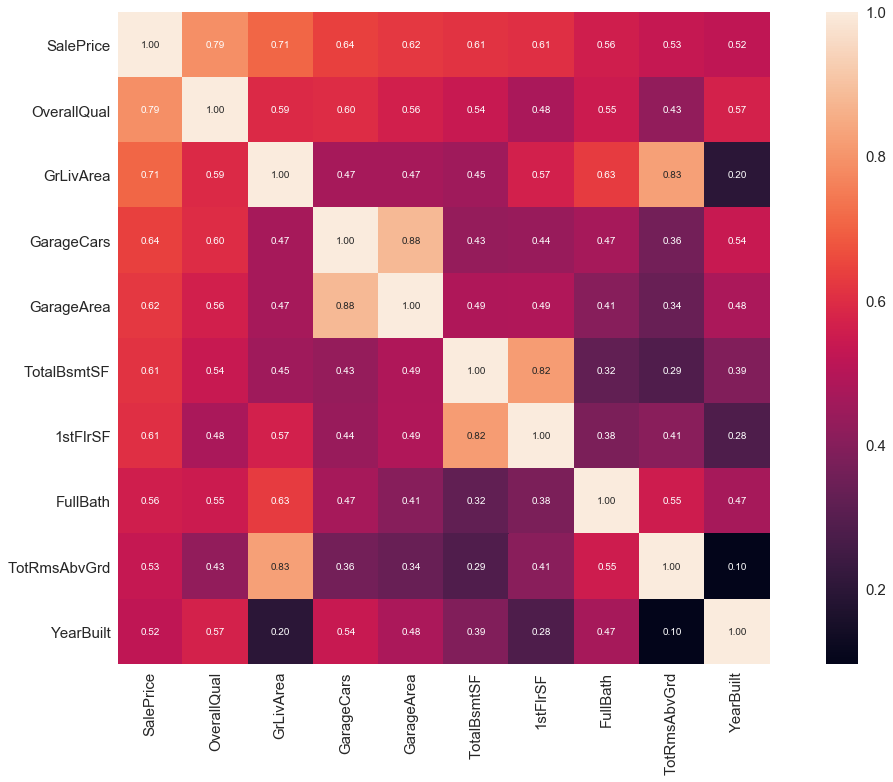

In [69]:
k = 10
cols = train_corr.nlargest(k, "SalePrice")["SalePrice"].index

cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

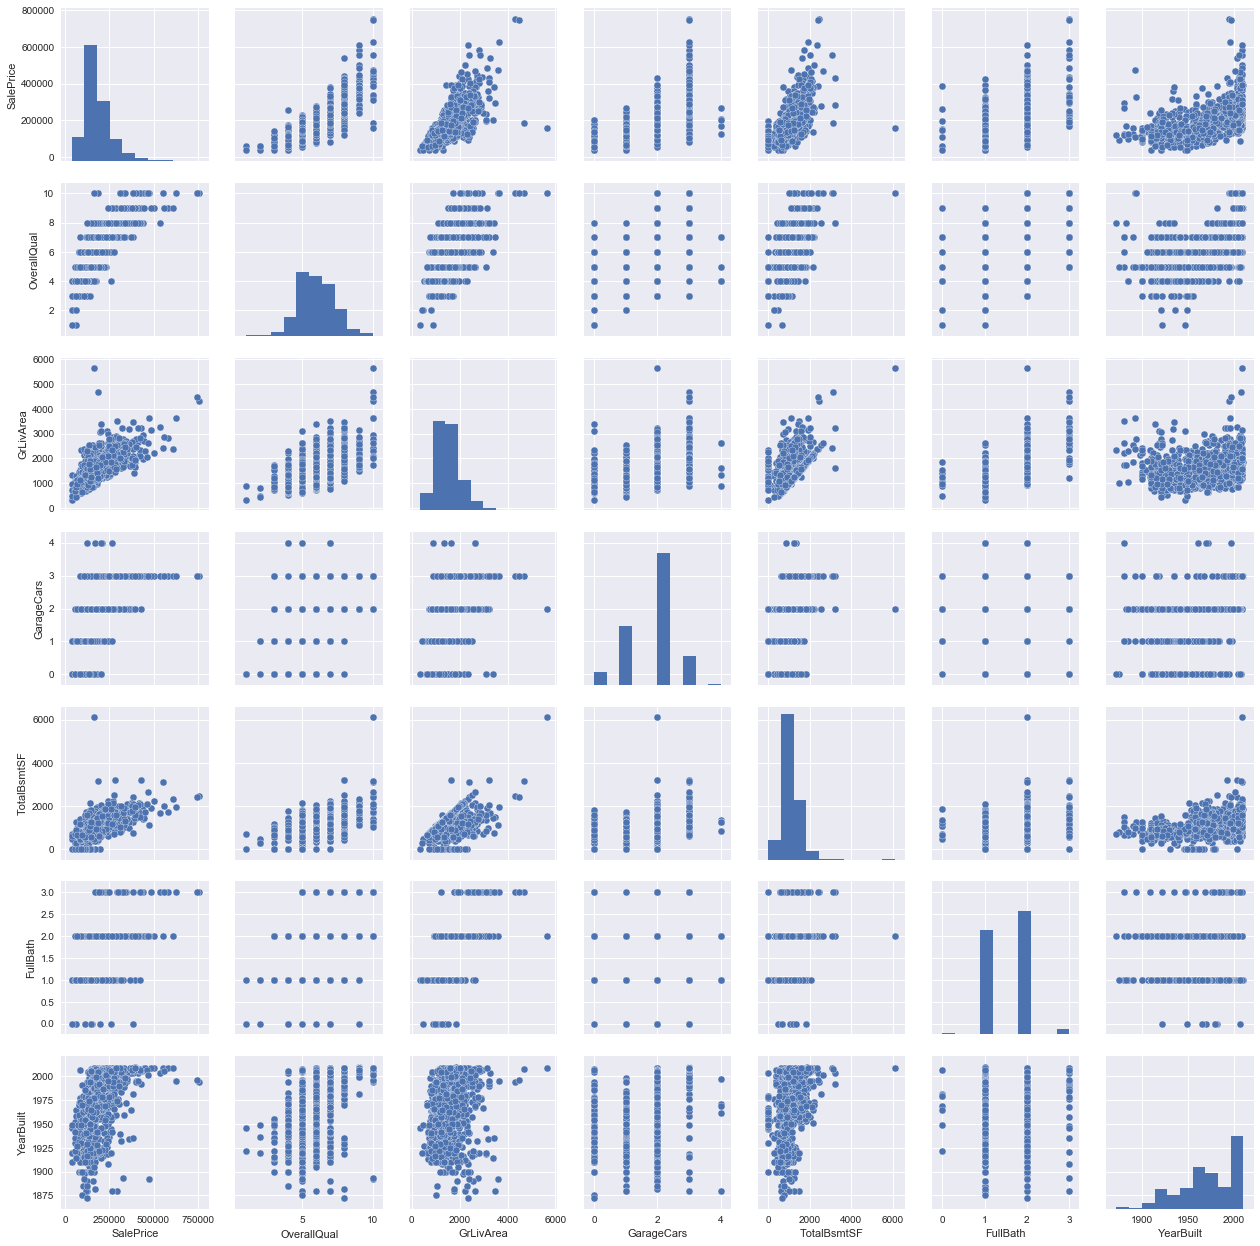

In [70]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols],size=2.5)


In [71]:
train[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
SalePrice      1460 non-null int64
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


In [72]:
test["SalePrice"] = None
train_test = pd.concat((train, test)).reset_index(drop=True)

In [73]:
total = train_test.isnull().sum().sort_values(ascending=True)
percent = (train_test.isnull().sum()/train_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Lost Percent'])

miss_data[miss_data.isnull().values == False].sort_values('Total', axis=0, ascending=False).head(20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Lost Percent
PoolQC,2909,0.996574
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
MiscFeature,2814,0.964029
Alley,2721,0.932169
Alley,2721,0.932169
Fence,2348,0.804385
Fence,2348,0.804385
SalePrice,1459,0.499829
SalePrice,1459,0.499829


In [92]:
miss_data.loc["SalePrice"]

Total           1459.000000
Lost Percent       0.499829
Name: SalePrice, dtype: float64

In [74]:
train_test = train_test.drop(miss_data[miss_data["Total"] > 1].index.drop('SalePrice'), axis=1)
tmp = train_test[train_test["SalePrice"].isnull().values == False]


,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
tmp.isnull().sum().max()

1

In [89]:
miss_data[miss_data.isnull().values == False].sort_values('Total', axis=0, ascending=False).loc["Electrical"]

,Total,Lost Percent
Electrical,1,0.000343
Electrical,1,0.000343


#### 峰度：用于度量构成分布的峰值是否突兀还是平坦，正态分布的峰度为3
#### 偏度：是对Sample构成的分布的对称性状况的描述，若偏度为负的左侧的离散度比右侧强

Skewness: 1.882876
Kurtosis: 6.536282


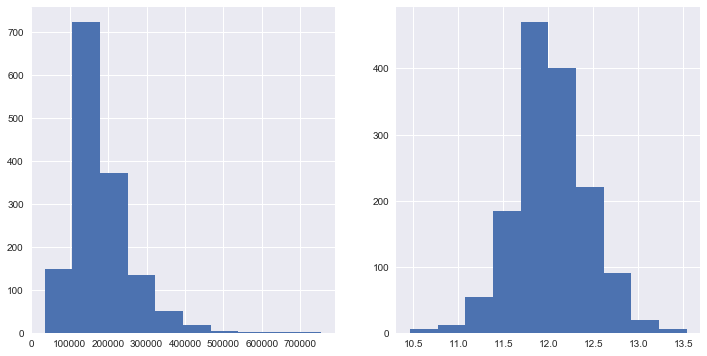

In [97]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(train.SalePrice)
ax2.hist(np.log1p(train.SalePrice))

print("Skewness: %f" % train["SalePrice"].skew())
print("Kurtosis: %f" % train["SalePrice"].kurt())

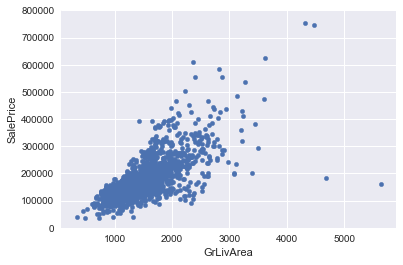

In [99]:
var = "GrLivArea"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot(kind="scatter", x = var, y="SalePrice", ylim=(0, 800000))

In [101]:
print(train.sort_values(by="GrLivArea", ascending=False)[:2])
tmp = train_test[train_test["SalePrice"].isnull().values == False]
train_test = train_test.drop(tmp[tmp["Id"] == 1299].index)
train_test = train_test.drop(tmp[tmp["Id"] == 524].index)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1298         Bnk    AllPub    ...          480     Gd   NaN         NaN   
523          Bnk    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298       0      1   2008       New        Partial     160000  
523        0     10   2007       New        Partial     184750  

[2 rows x 81 columns]


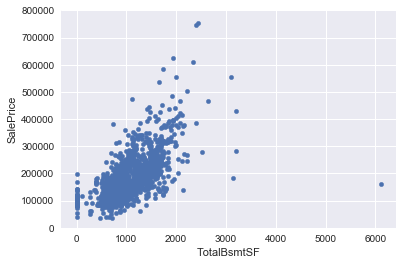

In [102]:
var = "TotalBsmtSF"
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot(kind="scatter", x=var, y="SalePrice", ylim=(0, 800000))

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


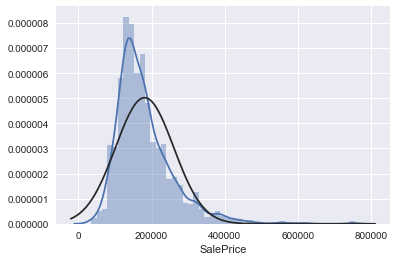

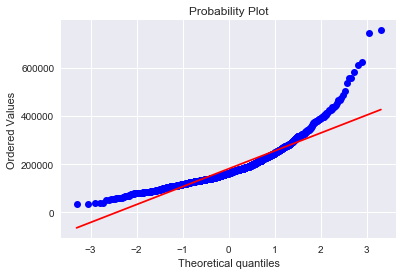

In [104]:
sns.distplot(train["SalePrice"], fit=norm)
fig = plt.figure()
res = stats.probplot(train["SalePrice"], plot=plt)

In [105]:
train_test["SalePrice"] = [i if i is None else np.log1p(i) for i in train_test["SalePrice"]]

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


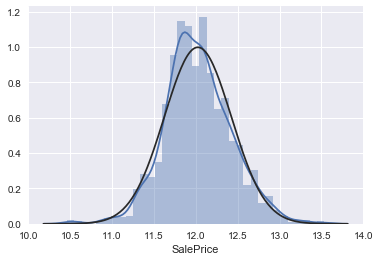

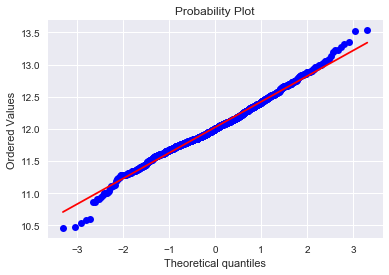

In [108]:
tmp = train_test[train_test["SalePrice"].isnull().values == False]
sns.distplot(tmp[tmp["SalePrice"] != 0]["SalePrice"], fit=norm)
fig = plt.figure()
res = stats.probplot(tmp["SalePrice"], plot=plt)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


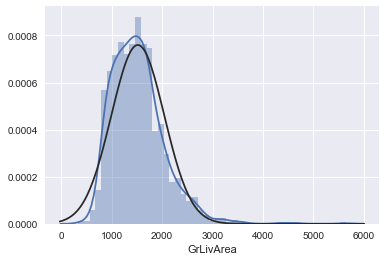

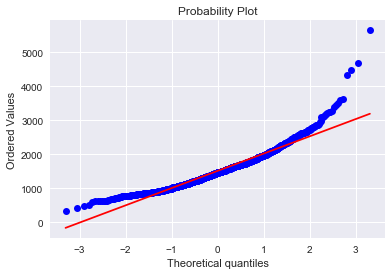

In [110]:
sns.distplot(train["GrLivArea"], fit=norm)
fig = plt.figure()
res = stats.probplot(train["GrLivArea"], plot=plt)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


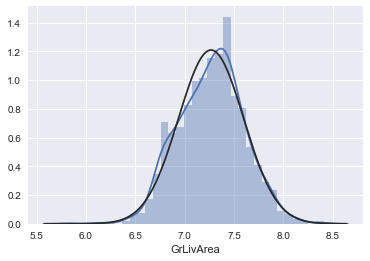

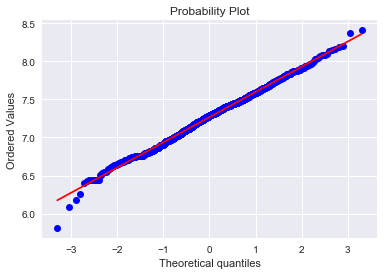

In [112]:
train_test["GrLivArea"] = [i if i is None else np.log1p(i) for i in train_test["GrLivArea"]]
tmp = train_test[train_test["SalePrice"].isnull().values == False]
sns.distplot(tmp["GrLivArea"], fit=norm)
fig = plt.figure()
res = stats.probplot(tmp["GrLivArea"], plot=plt)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


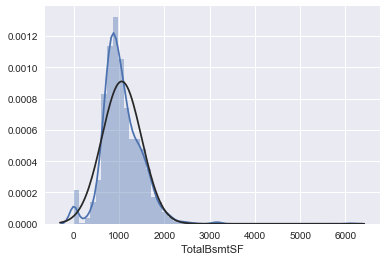

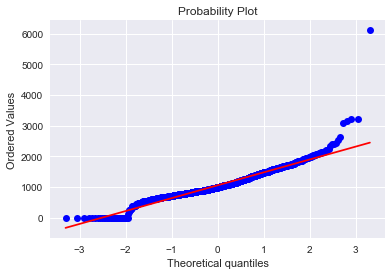

In [114]:
sns.distplot(train["TotalBsmtSF"], fit=norm)
fig = plt.figure()
res = stats.probplot(train["TotalBsmtSF"], plot=plt)

In [116]:
tmp = train_test[train_test["SalePrice"].isnull().values == False]
tmp = np.array(tmp.loc[tmp["TotalBsmtSF"] > 0, ["TotalBsmtSF"]])[:, 0]
tmp

array([ 856., 1262.,  920., ..., 1152., 1078., 1256.])

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


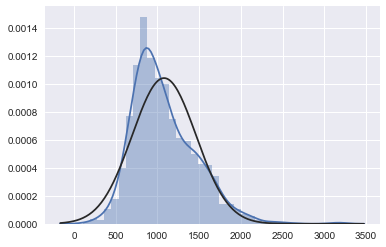

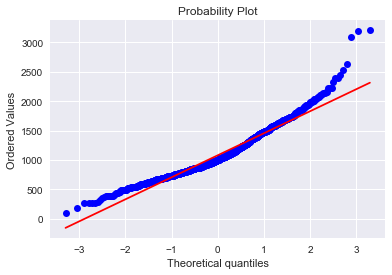

In [118]:
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

In [120]:
print(train.loc[train["TotalBsmtSF"] == 0, ["TotalBsmtSF"]].count())
train.loc[train["TotalBsmtSF"] == 0, "TotalBsmtSF"] = 1
print(train.loc[train["TotalBsmtSF"] == 1, ["TotalBsmtSF"]].count())

TotalBsmtSF    37
dtype: int64
TotalBsmtSF    37
dtype: int64


In [122]:
tmp = train_test[train_test["SalePrice"].isnull().values == False]
print(tmp["TotalBsmtSF"].head(10))
train_test["TotalBsmtSF"] = np.log1p(train_test["TotalBsmtSF"])
tmp = train_test[train_test["SalePrice"].isnull().values == False]
print(tmp["TotalBsmtSF"].head(10))

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
5     796.0
6    1686.0
7    1107.0
8     952.0
9     991.0
Name: TotalBsmtSF, dtype: float64
0    6.753438
1    7.141245
2    6.825460
3    6.629363
4    7.044033
5    6.680855
6    7.430707
7    7.010312
8    6.859615
9    6.899723
Name: TotalBsmtSF, dtype: float64


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


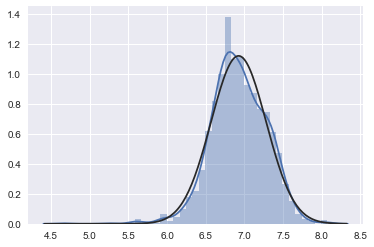

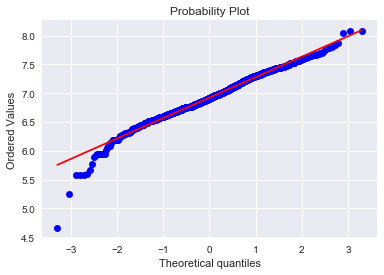

In [123]:
tmp = train_test[train_test["SalePrice"].isnull().values == False]
tmp = np.array(tmp.loc[tmp["TotalBsmtSF"] > 0, ["TotalBsmtSF"]])[:, 0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

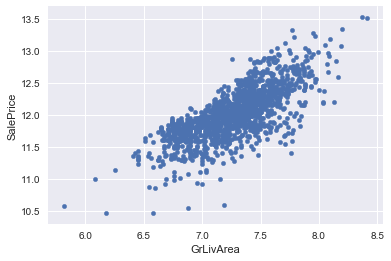

In [126]:
tmp = train_test[train_test["SalePrice"].isnull().values == False]
tmp.plot(kind="scatter", x = "GrLivArea", y = "SalePrice")

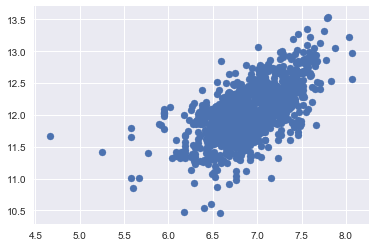

In [127]:
tmp = train_test[train_test["SalePrice"].isnull().values == False]
plt.scatter(tmp[tmp["TotalBsmtSF"] > 0]["TotalBsmtSF"], tmp[tmp["TotalBsmtSF"] > 0]["SalePrice"])

In [131]:
tmp = train_test[train_test["SalePrice"].isnull().values == False]
tmp_1 = train_test[train_test["SalePrice"].isnull().values == True]

x_train = tmp[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

y_train = tmp["SalePrice"].values.ravel()
x_test = tmp_1[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

In [132]:
x_test["GarageCars"].fillna(x_test.GarageCars.median(), inplace = True)
x_test["TotalBsmtSF"].fillna(x_test.TotalBsmtSF.median(), inplace = True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0.16636121334536996


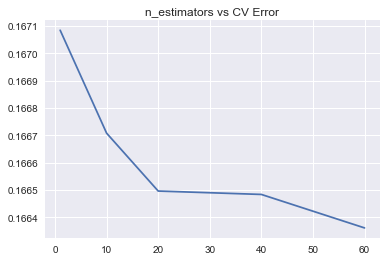

In [135]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor

ridge = Ridge(alpha = 0.1)
params = [1, 10, 20, 40, 60]
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator = ridge, n_estimators = param)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring="neg_mean_squared_error"))
    test_scores.append(np.mean(test_score))
print(test_score.mean())
plt.plot(params, test_scores)
plt.title("n_estimators vs CV Error")
plt.show()

In [140]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import xg

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
